# 1차원 데이터의 정리

## 2.1 데이터 중심의 지표
1) 평균값<br>
2) 중앙값<br>
3) 최빈값

### 0) 데이터 준비

In [1]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
!ls ./sample_data

anscombe.json		      ch2_scores_em.csv      README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [3]:
df = pd.read_csv('./sample_data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
# 10명의 영어 점수를 array 데이터 구조 scores에 저장
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [15]:
# 데이터프레임 scores_df 작성
scores_df = pd.DataFrame({'score':scores}, # column:실제값
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', # 인덱스 할당(default:숫자)
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 1) 평균값
예) scores의 평균값
1. sum(scores)/len(scores)
2. np.mean(scores)
3. scores_df.mean()

In [16]:
#1 평균값 : sum(data) / len(data)

sum(scores) / len(scores)

55.000

In [17]:
#2 평균값 : np.mean(data)

np.mean(scores)

55.000

In [18]:
#3 평균값 : data.mean()

scores_df.mean()

score    55.0
dtype: float64

### 2) 중앙값
크기 순서대로 나열할 때 중앙에 위치한 값, 이상값 영향을 덜 받음<br>
예) scores의 중앙값
1. 정렬<br>
sorted_scores = np.sort(scores)
2. 짝수 개면 n/2, n/2 + 1의 평균, 홀수 개면 (n+1)/2 <br>
if n%2 == 0: median = (sorted_scores[n//2-1] + sorted_scores[n//2]) / 2 <br>
else median = sorted_scores((n+1)//2 - 1)

In [26]:
#4 정렬 : np.sort(data)

sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [27]:
#5 중앙값 : len(data)가 짝수이면 median=(data[n//2-1] + data[n//2])/2 , 홀수이면 median=data[(n+1)/2-1]

n = len(sorted_scores)
if n % 2 == 0: # 데이터의 개수가 짝수 개이면
    m0 = sorted_scores[n//2 - 1] # 인덱스 0부터 시작하니까 1 빼기
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:          # 데이터의 개수가 홀수 개이면
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [28]:
#6 중앙값 : np.median(data)

np.median(scores)

56.500

In [29]:
#7 중앙값 : data.median()

scores_df.median()

score    56.5
dtype: float64

In [40]:
# 참고 - 절사평균

# 10% 절사평균
# 예) 20개의 자료 중 양쪽에서 하나씩 모두 2개를 제거한 뒤 18개의 평균
datas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ten_percent_datas = datas[1:19]
ten_percent_mean = np.mean(ten_percent_datas)
print('10% 절사평균', ten_percent_mean)

# 20% 절사평균
# 예) 20개의 자료 중에서 양쪽에서 두개씩 모두 4개를 제거한 뒤 16개의 평균
twenty_percent_datas = datas[2:18]
twenty_percent_mean = np.mean(twenty_percent_datas)
print('20% 절사평균', twenty_percent_mean)

# 다이빙 점수
# 7명의 심판 중 최고점과 최저점을 제외하고 5명의 평균에 난이도를 고려해서 계산
diving_scores = [18, 16, 19, 15, 13, 15, 17]
sorted_diving_scores = np.sort(diving_scores)
sorted_diving_mean = np.mean(sorted_diving_scores[1:6]) # 1번 인덱스부터 5번 인덱스까지의 평균
print('다이빙 점수', sorted_diving_mean)

10% 절사평균 10.5
20% 절사평균 10.5
다이빙 점수 16.2


### 3) 최빈값
데이터에서 가장 많이 나타내는 값<br>
DataFrame, Series의 mode 메소드
예) scores의 최빈값
1. pd.Series(scores).mode()

In [53]:
#8 최빈값 : data.mode()

pd.Series([1, 1, 1, 2, 2, 3]).mode() # 결과는 index - value 쌍으로 출력

0    1
dtype: int64

In [54]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 2.2 데이터의 산포도 지표
분산과 표준편차, 범위와 사분위 범위, 데이터의 지표 정리

### 1) 분산과 표준편차

#### 편차
'데이터'가 '평균'으로부터 떨어져 있는 정도


In [55]:
#11 편차 = 데이터 - 평균
#   deviation = data - np.mean(data)

mean = np.mean(scores)                  # 평균 구하기
deviation = scores - mean               # 편차 구하기(데이터 - 평균)
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [57]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)              # 평균 구하기
another_deviation = another_scores - another_mean   # 편차 구하기
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [58]:
# 해석
print('scores의 평균: ', mean)
print('another_scores의 평균: ', another_mean)
# scores와 another_scores의 평균은 같다

print('scores의 편차: ', deviation)
print('another_scores의 편차: ', another_deviation)
# scores와 another_scores 중 another_scores의 편차가 작다

scores의 평균:  55.0
another_scores의 평균:  55.0
scores의 편차:  [-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]
another_scores의 편차:  [-5.  5.  3. -1. -4.  1.  2. -2. -3.  4.]


In [59]:
#12 편차의 평균 = 0

np.mean(deviation)

0.000

In [60]:
np.mean(another_deviation)

0.000

In [65]:
# 응용 - dataframe에 deviation 열 넣기
summary_df = scores_df.copy()       # dataframe 복사
summary_df['deviation'] = deviation # 'deviation' 열에 deviation 대입
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [66]:
summary_df.mean()               # 'score' 열의 평균 : 55 / 'deviation' 열의 평균 : 0

score        55.0
deviation     0.0
dtype: float64

#### 분산
(편차)^2 의 평균<br>
예) scores의 분산
1. np.mean(deviation ** 2)
2. np.var(scores)<br>

분산이 필요한 이유 : 편차의 평균이 0이기 때문에 분산 필요<br>

불편분산 : (편차)^2의 합을 (데이터의 개수-1)로 나눔<Br>
DataFrame, Series의 var 메서드<br>
예) scores_df의 분산<br>
3. scores_df.var()

분산이 크다 = 편차가 크다 = 평균으로부터 떨어져 있다 = sparse하다<br>
--> 모델링하기 어렵다. 전처리로 다른 대푯값을 찾거나 기계학습을 못한다<br>


In [67]:
#13 분산 = 편차 제곱의 평균
#   var = np.mean(deviation ** 2)

np.mean(deviation ** 2)         # **2 => ^2

86.000

In [68]:
#14 분산 = np.var(data)

np.var(scores)

86.000

In [72]:
#15 분산 = data.var()

scores_df.var()                 # dataframe의 분산은 불편분산

score    95.556
dtype: float64

In [78]:
# 참고 - 불편분산
# 편차 제곱의 합을 n-1 로 나눔

print(sum(deviation ** 2) / (len(scores_df)-1))

95.55555555555556


In [81]:
# 응용 - dataframe에 square of deviation 열 넣기
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [82]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차
분산에 제곱근 취함 <br>
표준편차가 필요한 이유 : 원래 데이터와 동일한 단위를 쓰는 지표가 필요
예) scores의 분산
1. np.sqrt(np.var(scores, ddof=0))
2. np.std(scores, ddof=0)

In [ ]:
#16 표준편차 = np.sqrt(np.var(data, ddof=0))
#   표준편차 = 분산의 제곱근

np.sqrt(np.var(scores, ddof=0))

9.274

In [ ]:
#17 표준편차 = np.std(data, ddof=0)

np.std(scores, ddof=0)

9.274

### 2) 범위와 4분위수 범위

#### 범위
범위 : 최댓값 - 최솟값 <br>
사분위 : 상위수%와 하위수%에 위치하는 값의 차이 <br>
- 제1사분위수(Q1) : 하위 25%
- 제2사분위수(Q2) : 하위 50%
- 제3사분위수(Q3) : 하위 75% 


중앙값이 하한에 가깝다 = 이상값이 많을 수 있다

In [83]:
#9. 최댓값 : np.max(data), 최솟값 : np.min(data)

np.max(scores) - np.min(scores)

28

#### 4분위수 범위
사분위 범위 : IQR = Q3 - Q1

In [84]:
#10 절사평균 : np.percentile(data, 25)

scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

### 2) 데이터의 지표 정리
예) scores의 지표 정리
1. pd.Series(scores).describe()

In [ ]:
#18 describe() : count, mean, std, min, 25%, 50%, 75%, max 값 정리

pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3 데이터의 정규화

### 표준화
데이터에서 평균을 빼고 표준편차로 나눔<br>
예) scores의 표준화<br>
1. z = (scores - np.mean(scores)) / np.std(scores) <br>

표준화 변량, Z 점수<br>
평균 : 0, 표준편차 : 1<br>
표준화를 하는 이유 : 통일된 지표로 변환하기 위해<br>

In [86]:
#19 표준화 = (data - np.mean(data)) / np.std(data)
#   표준화 = (데이터 - 평균) / 표준편차

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [88]:
#20 표준화의 평균은 0, 표준편차는 1

np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 편찻값
평균 : 50, 표준편차 10<br>
예) scores의 편찻값
1. z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)

In [89]:
#21 편차값 = 평균은 50, 표준편차가 10이 되도록 정규화

z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [91]:
# 응용 - dataframe에 deviation value 열 넣기
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 2.4 데이터의 시각화

In [92]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 도수분포표
데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법
- 계급 : 구간  예) 0~10점
- 도수 : 학생 수  예) 2명
- 계급폭 : 각 구간의 폭  예) 10점
- 계급수 : 계급의 수  예) 10개
- 계급값 : 계급을 대표하는 값  예) 5, 15, 25, ...

예) english_scores를 0부터 100까지 10개의 구간으로 나눌 때
```
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
```

상대도수 : 전체 데이터 중 해당 계급의 데이터가 차지하는 비율
```
rel_freq = freq / freq.sum()
```
누적 상대도수 : 해당 계급까지의 상대도수의 합
```
cum_rel_freq = np.cumsum(rel_freq)
```

In [106]:
freq = np.histogram(english_scores, bins=20, range=(0,100))
freq

(array([ 0,  0,  0,  0,  0,  0,  0,  2,  3,  5,  5, 11,  8, 10,  4,  2,  0,
         0,  0,  0]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]))

In [98]:
#22 freq, _ = np.histogram(data, bins, range)
#   bins = 계급폭      예) 10 : 10 단위로
#   range = 계급의 수  예) (0, 100) : 0부터 100까지 -> 총 10개로 나눔

freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [99]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class, name='class'))   # pd.DataFrame index : 행, columns : 열
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [100]:
#23 interval = (i+(i+10))//2  계급의 중앙값 이용

class_value = [(i+(i+10))//2 for i in range(0, 100, 10)] 
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [101]:
#24 상대도수 = 도수 / 전체 도수의 합

rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [102]:
#25 누적상대도수 = 상대도수의 합

cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [108]:
freq_dist_df['class value'] = class_value                         # 계급값
freq_dist_df['relative frequency'] = rel_freq                     # 상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq      # 누적 상대도수
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']] # column 명 정하기

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토
최대가 되는 계급의 계급값(가장 분포가 많이 되어 있는 계급)
```
dataframe.loc[dataframe['frequency'].idxmax()]
```

In [129]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax()]

class value                      65.00
frequency                        18.00
relative frequency                0.36
cumulative relative frequency     0.88
Name: 60~70, dtype: float64

In [130]:
#26 최빈값 = data['column'].idxmax()
#   최빈값 = 최대가 되는 계급의 계급값(가장 분포가 많이 되어 있는 계급의 계급값)

freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']
                # idxmax : 최대값을 가지는 인덱스 레이블 출력

65

### 히스토그램

In [131]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

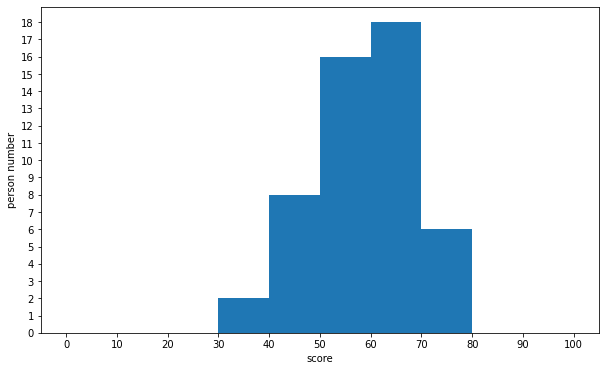

In [132]:
#27 히스토그램 그리기

# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

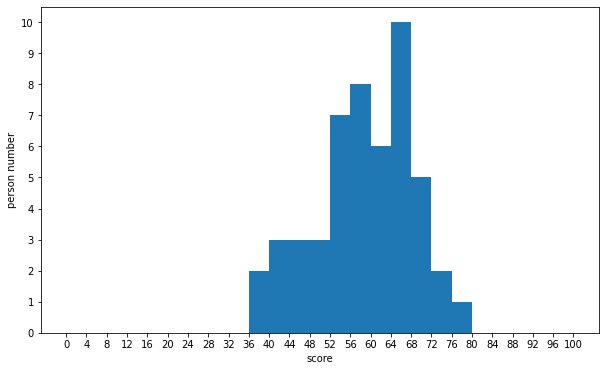

In [133]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

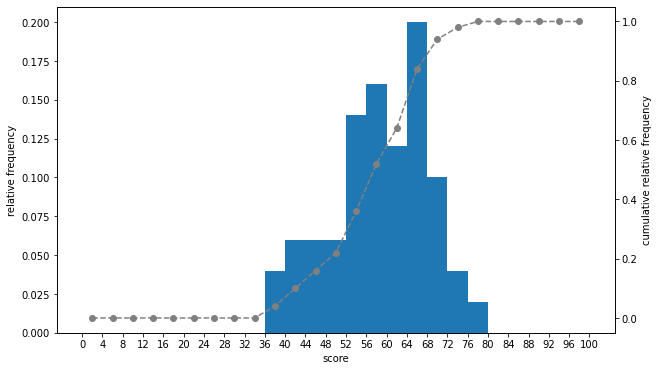

In [134]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림

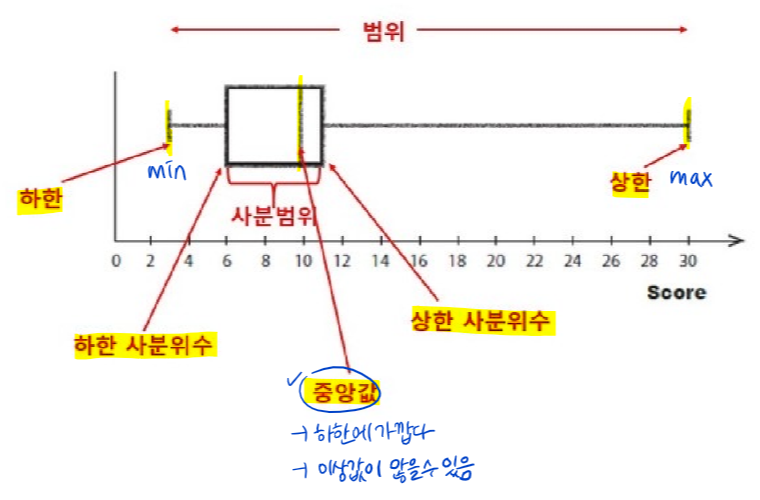

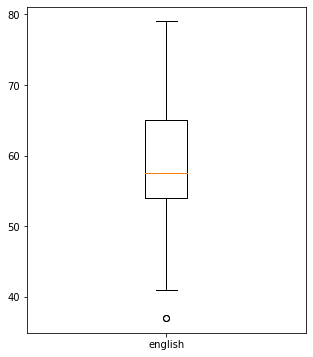

In [ ]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()